1.  To classify the image of a handwritten single digit number from 0 to 9 - Classification Problem
2.  Deep Learning Model - Neural Network (NN)
3.  Work Flow

    *   Collect MNIST Handwritten Data - Keras Dataset
    *   Data Pre-Processing
    *   Train-Test Split
    *   Deep Learning Model - Neural Network Model (NN)
    *   DL Model Evaluation
    *   Develop Prediction System - Feed new data to trained model to predict the handwritten digit number

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) # similar in random_state function
from tensorflow import keras
from keras.datasets import mnist # import mnist datasets from keras datasets
from tensorflow.math import confusion_matrix

Data Collection and Image Processing

In [ ]:
# Loading MNIST datasets from keras.datasets

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# X_train - 60 000 images with dimension of 28 x 28 pixels (1 channel - grayscale image)
# Y_train - 60 000 images (1 channel - grayscale image)
# X_test - 10 000 images with dimension of 28 x 28 pixels (1 channel - grayscale image)
# Y_test - 10 000 images (1 channel - grayscale image)

# Training data - 60 000 images
# Test data - 10 000 images

# Images dimension - 28 x 28 pixels
# Channel 1 image - grayscale images

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10]) # print the eleventh element

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape) # single image dimension

(28, 28)


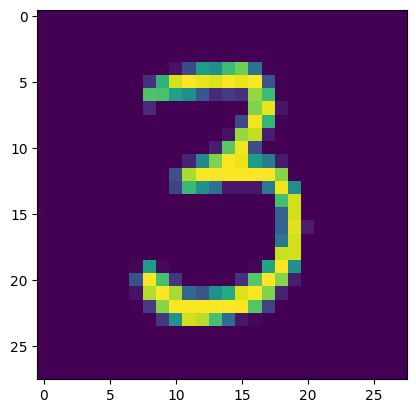

3


In [ ]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label

print(Y_train[50])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# Method 1 - To find the different elements in the labeled dataset (target)
# use unique function in numpy

# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Method 2 - To find the different elements in the labeled dataset (target)
# use One Hot Encoding
      # eg. if there is 10 elements with the values of 0 to 9, the 0 value will be displayed as 1 and the rest as 0 = [1 0 0 0 0 0 0 0 0 0]
      # and if there is 10 elements with the values of 0 to 9, the 0 value will be displayed as 1 and the rest as 0 = [1 0 0 0 0 0 0 0 0 0]

Normalization

*  The current values in the numpy array is in the range of 0 - 255, so the values need to be scaled/normalized to convert the values from 0 - 255 to 0 - 1 only to make it easy for the NN to process

In [ ]:
# scaling/normalized the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10]) # print a single image numpy array

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Model Training - Neural Network (NN)

In [ ]:
# setting up the layers of the NN

model = keras.Sequential([

                          keras.layers.Flatten(input_shape=(28,28)), # Flatten the matrix of 28 x 28 to a single array/vector # if work on RGB image = (28,28,3)
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') # output neurons - the output have 10 output (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the NN

model.compile(

              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']

)

In [ ]:
# training the NN

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8482 - loss: 0.5096
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9553 - loss: 0.1489
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1079
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9745 - loss: 0.0851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9789 - loss: 0.0708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9867 - loss: 0.0432
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9889 - loss: 0.0367
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0339


Model Evaluation

In [ ]:
# accuracy on test data

loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9656 - loss: 0.1485


In [ ]:
# Training data accuracy = 98.9 %
# Test data accuracy = 96.6 %

In [ ]:
print(X_test.shape)

(10000, 28, 28)


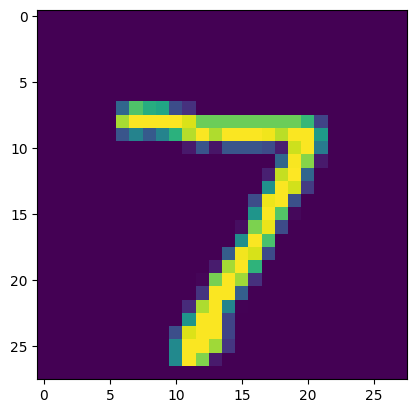

In [ ]:
# first data in X_test data

plt.imshow(X_test[0])
plt.show()

In [ ]:
# print the actual/true label in Y_test data

print(Y_test[0])

7


In [ ]:
# predict all the data in X_test

Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

# the result will not show the exact label but will show the probability for each class/label for each data point

[1.4806795e-06 1.3315199e-07 6.7267740e-01 9.9548298e-01 1.0867838e-09
 2.2096558e-02 4.8383051e-16 9.9999952e-01 9.1830036e-04 1.6292857e-03]


In [ ]:
# converting the prediction probabilities to class label for 1 data point

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# converting the prediction probabilities to class label for all data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

X_pred_labels --> Predicted labels

Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_matrix)

tf.Tensor(
[[ 947    0    2    1    4    1    8    1    1   15]
 [   1 1113    5    3    0    1    4    6    2    0]
 [   2    1 1005    5    4    0    2   10    3    0]
 [   2    0    9  981    0    4    0    9    2    3]
 [   0    0    3    0  964    0    6    4    0    5]
 [   2    0    0   14    1  859    9    1    2    4]
 [   1    2    2    0    5    3  945    0    0    0]
 [   0    1    5    0    0    1    1 1014    0    6]
 [   2    0    6   24    7    8    9    7  904    7]
 [   0    2    2    5   18    4    0    9    2  967]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

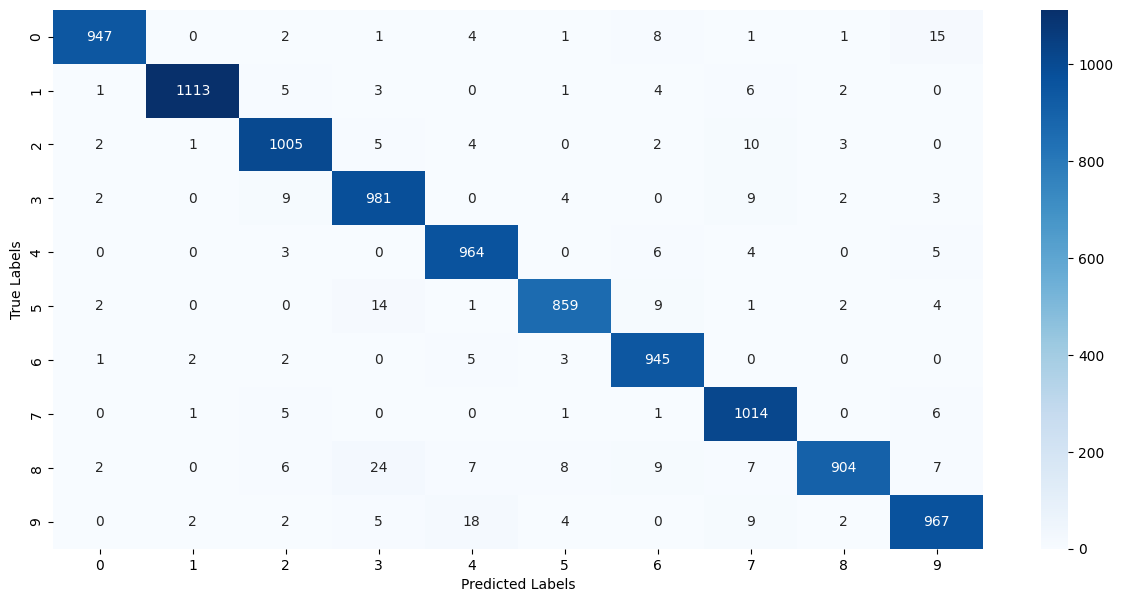

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') # fmt='d' - show the value as integer
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building A Predictive System

In [ ]:
input_image_path = '/content/mnist_digit.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


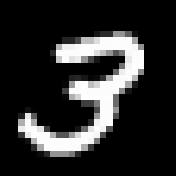

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(176, 176, 3)

In [ ]:
# convert RGB image to Grayscale image

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(176, 176)

In [ ]:
# resized the image to 28 x 28

input_image_resize = cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
# scaling/normalization of the data

input_image_resize = input_image_resize/255

In [ ]:
# reshape the image into a single data point, 1 with dimension 28 x 28 = [1,28,28] # if working with RGB, have to add [1,28,28,3]

image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_pred = model.predict(image_reshaped)

print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.26682064 0.16017282 0.6018853  0.2231505  0.66709286 0.5183586
  0.26509055 0.3896549  0.47501478 0.3924016 ]]


In [ ]:
input_pred_label = np.argmax(input_pred)

print(input_pred_label)

4


Predictive System

Path of the image to be predicted: /content/mnist_digit.png


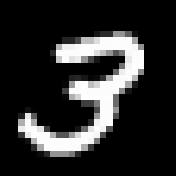

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The Handwitten Digit is:  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print('The Handwitten Digit is: ', input_pred_label)